In [802]:
## Loading the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

In [803]:
# Loading the dataset
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [804]:
# Checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [805]:
# Getting the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [806]:
# Checking fo duplicates
df.drop_duplicates(inplace = True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [807]:
# Descriptive Analysis
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


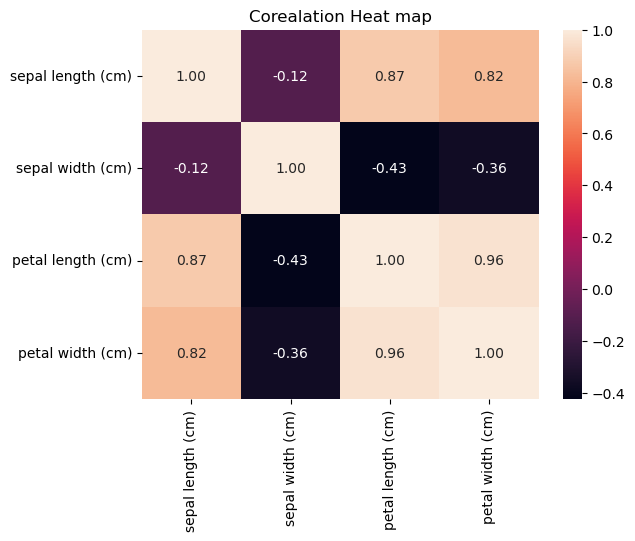

In [808]:
# Plotting the heat map

corealtion_matrix = df.corr()

sns.heatmap(corealtion_matrix,annot=True,cmap='rocket',fmt='.2f')
plt.title('Corealation Heat map')
plt.show()

## Clustering Algorithm

#### A) KMeans Clustering

In [811]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
X = pd.DataFrame(scaled_data)

In [812]:
X.head()

,0,1,2,3
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


In [813]:
import warnings
warnings.filterwarnings("ignore")

In [814]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#### Elbow method :
The Elbow Method is a technique used in KMeans clustering to determine the optimal number of clusters (K) for a dataset. It works by plotting the within-cluster sum of squares (WCSS) against different values of K and looking for the "elbow point" in the graph. The elbow point is where the rate of decrease in WCSS slows significantly, indicating that adding more clusters does not provide substantial improvement in clustering performance. This optimal K balances model simplicity and accuracy, avoiding both underfitting and overfitting.

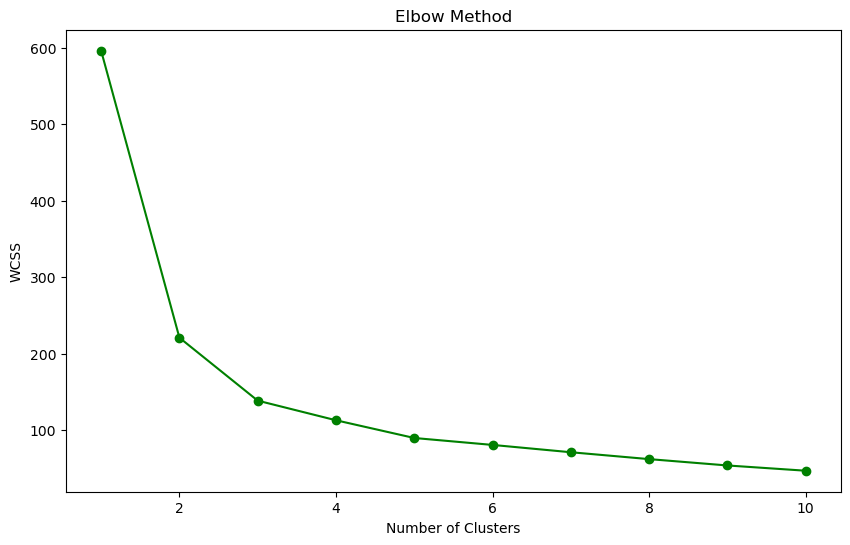

In [816]:
# Plotting the elbow method

plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss, marker = 'o',color = 'g')
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

#### Taking K = 5 from the graph

In [818]:
# applying kmeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=5, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [819]:
df['Cluster'] = y_kmeans
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,4
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,4


In [820]:
# Applying PCA for comparison

pca = PCA(n_components =2)
df_pca = pca.fit_transform(X)

In [821]:
df_pca

array([[-2.25269158e+00,  4.79299423e-01],
       [-2.07100441e+00, -6.74233952e-01],
       [-2.35314718e+00, -3.40442064e-01],
       [-2.28876231e+00, -5.95440778e-01],
       [-2.37729413e+00,  6.46885300e-01],
       [-2.06233579e+00,  1.48735169e+00],
       [-2.43205441e+00,  5.01784240e-02],
       [-2.22124438e+00,  2.22920844e-01],
       [-2.32468093e+00, -1.11233754e+00],
       [-2.17393647e+00, -4.69164509e-01],
       [-2.15372644e+00,  1.04128247e+00],
       [-2.31439973e+00,  1.34128141e-01],
       [-2.20836461e+00, -7.28302820e-01],
       [-2.62241020e+00, -9.57873840e-01],
       [-2.18502153e+00,  1.85550449e+00],
       [-2.24685180e+00,  2.68321162e+00],
       [-2.19408649e+00,  1.48183222e+00],
       [-2.17837789e+00,  4.88282008e-01],
       [-1.88595391e+00,  1.40095580e+00],
       [-2.33010833e+00,  1.12767836e+00],
       [-1.90318298e+00,  4.06025713e-01],
       [-2.19423860e+00,  9.23988780e-01],
       [-2.76123087e+00,  4.61020699e-01],
       [-1.

In [822]:
# Converting to dataframa
X_pca = pd.DataFrame(df_pca, columns = ['PC1','PC2']) # Reducing data using pca
X_pca.head()

,PC1,PC2
0,-2.252692,0.479299
1,-2.071004,-0.674234
2,-2.353147,-0.340442
3,-2.288762,-0.595441
4,-2.377294,0.646885


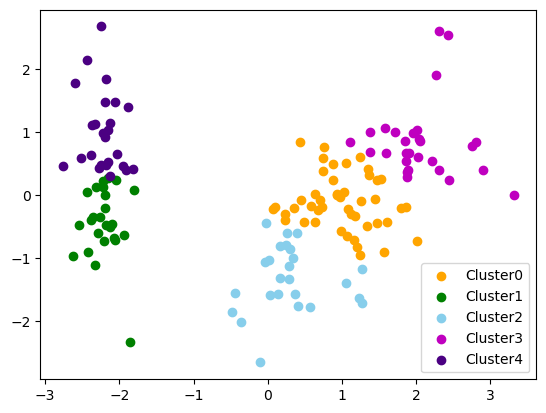

In [823]:
# Using custom colours
colors = ['orange','g','skyblue','m','indigo']

for i in range(5):
  cluster_data = X_pca[y_kmeans ==i]
  plt.scatter(cluster_data['PC1'],
              cluster_data['PC2'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

#### B) Hierarchical Clustering

In [825]:
X.head()

,0,1,2,3
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


In [826]:
X_hc = df.values

In [827]:
X_hc

array([[5.1, 3.5, 1.4, 0.2, 4. ],
       [4.9, 3. , 1.4, 0.2, 1. ],
       [4.7, 3.2, 1.3, 0.2, 1. ],
       [4.6, 3.1, 1.5, 0.2, 1. ],
       [5. , 3.6, 1.4, 0.2, 4. ],
       [5.4, 3.9, 1.7, 0.4, 4. ],
       [4.6, 3.4, 1.4, 0.3, 1. ],
       [5. , 3.4, 1.5, 0.2, 1. ],
       [4.4, 2.9, 1.4, 0.2, 1. ],
       [4.9, 3.1, 1.5, 0.1, 1. ],
       [5.4, 3.7, 1.5, 0.2, 4. ],
       [4.8, 3.4, 1.6, 0.2, 1. ],
       [4.8, 3. , 1.4, 0.1, 1. ],
       [4.3, 3. , 1.1, 0.1, 1. ],
       [5.8, 4. , 1.2, 0.2, 4. ],
       [5.7, 4.4, 1.5, 0.4, 4. ],
       [5.4, 3.9, 1.3, 0.4, 4. ],
       [5.1, 3.5, 1.4, 0.3, 4. ],
       [5.7, 3.8, 1.7, 0.3, 4. ],
       [5.1, 3.8, 1.5, 0.3, 4. ],
       [5.4, 3.4, 1.7, 0.2, 4. ],
       [5.1, 3.7, 1.5, 0.4, 4. ],
       [4.6, 3.6, 1. , 0.2, 4. ],
       [5.1, 3.3, 1.7, 0.5, 1. ],
       [4.8, 3.4, 1.9, 0.2, 1. ],
       [5. , 3. , 1.6, 0.2, 1. ],
       [5. , 3.4, 1.6, 0.4, 1. ],
       [5.2, 3.5, 1.5, 0.2, 4. ],
       [5.2, 3.4, 1.4, 0.2, 4. ],
       [4.7, 3

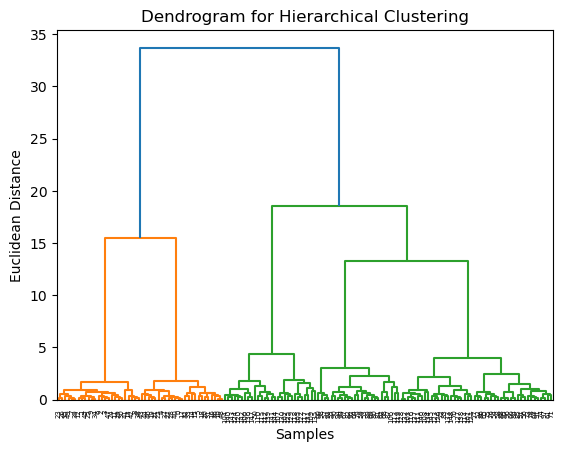

In [828]:
# Using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_hc, method = 'ward'))


plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


In [829]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')

In [830]:
y_hc = hc.fit_predict(X_hc)

In [831]:
y_hc

array([4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 4, 3, 4, 3, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0,
       0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2], dtype=int64)

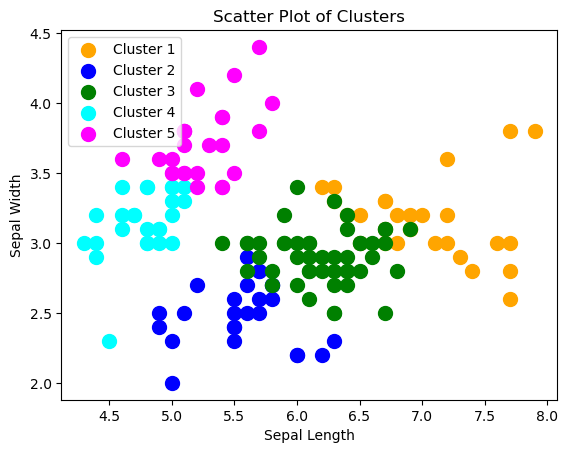

In [832]:
# Plotting data points from Cluster 1
plt.scatter(X_hc[y_hc == 0, 0], X_hc[y_hc == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')

# X_hc[y_hc == 0, 0] represents the x-coordinates of the data points in cluster 0
# X_hc[y_hc == 0, 1] represents the y-coordinates of the data points in cluster 0

# Plotting data points from Cluster 2
plt.scatter(X_hc[y_hc == 1, 0], X_hc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

# Plotting data points from Cluster 3
plt.scatter(X_hc[y_hc == 2, 0], X_hc[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Plotting data points from Cluster 4
plt.scatter(X_hc[y_hc == 3, 0], X_hc[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

# Plotting data points from Cluster 5
plt.scatter(X_hc[y_hc == 4, 0], X_hc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Scatter Plot of Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [833]:
# silhouette score
from sklearn.metrics import silhouette_score

sil_sc = silhouette_score(X_hc, y_hc)
sil_sc

0.7011420828859187